In [ ]:
# ! pip install wordcloud

In [2]:
import pandas as pd
from konlpy.tag import Hannanum
# from konlpy.tag import Kkma
# from konlpy.tag import Komoran
# from konlpy.tag import Mecab
# from konlpy.tag import Twitter
import wordcloud
# from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk  # NLTK(Natural Language Toolkit) 
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JuhnnyKo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

## 크롤링 데이터 불러오기

In [201]:
df_petition = pd.read_csv('data/petition_crawling_low_birth_rate.csv', sep = ',', encoding='UTF-8')
df_petition.head()

,Unnamed: 0,제목,청원시작,청원인원,Link
0,0,저출산 관련 육아휴직 및 어린이집 증설,2018-10-31,3,https://www1.president.go.kr/petitions/427334
1,1,저출산 ↔ 어린이집 부족. 서로 너무 상충되는 관계 아닌가요?,2018-10-31,7,https://www1.president.go.kr/petitions/427316
2,2,어린이집을 유지해주세요,2018-10-31,476,https://www1.president.go.kr/petitions/426902
3,3,오늘 안하면 늦습니다. 누구나 마음놓고 출산할 수 있는 제도 마련 시급합니다.,2018-10-31,2,https://www1.president.go.kr/petitions/426884
4,4,가족돌봄휴가제도를 조속히 시행해야 합니다.,2018-10-31,2,https://www1.president.go.kr/petitions/426830


In [5]:
df_hankr = pd.read_csv('data/hankr_lowBirthRate.csv', sep = ',', encoding='UTF-8')
df_hankr.head()

,Unnamed: 0,Title,Date
0,0,"문 대통령, 1일 국회서 새해 예산안 시정연설",2018.10.31
1,1,“변화된 노동 기준에 맞춘 노동자 인격 연계 권리보장제도 구상”,2018.10.25
2,2,지자체 39% 생존위기…돈맥경화 풀어줄 해법은?,2018.10.25
3,3,충남도 조직개편안…‘새마을’ 지우고 ‘남북교류’ 신설,2018.10.25
4,4,[시론] ‘저출생’으로는 ‘저출산’ 못 막는다 / 최슬기,2018.10.24


In [6]:
df_chosun = pd.read_csv('data/cho_birth_final.csv', sep = ',', encoding='EUC-kR')
df_chosun.head()

,Unnamed: 0,Unnamed: 0.1,Title,Date
0,0,0,"왜 분만실 아내들은 남편에게 '저리가' 화를 내지? 의문이 풀렸다, 남편 손보다 ...",2018. 10. 25
1,1,1,우리·IBK기업은행서 아이 명의 통장 만들면 1만원 들어와요,2018. 10. 25
2,2,2,"""어린이집 공급률 10%p 늘어나면 둘째·셋째 낳겠다는 부모도 는다""(1.39%p)",2018. 10. 22
3,3,3,"한국 출산연령, 세계 평균보다 4.4세 많다",2018. 10. 18
4,4,4,예산 느는데 아이들은 확 줄어… 돈 주체 못하는 시·도교육청,2018. 10. 18


## 검색결과 개수 비교

### 총 개수 비교

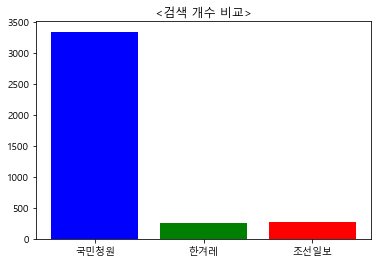

In [202]:
a = [len(df_petition), len(df_hankr), len(df_chosun)]
plt.bar(0, len(df_petition), color='b')
plt.bar(1, len(df_hankr), color='g')
plt.bar(2, len(df_chosun), color = 'r')
plt.xticks(range(3),['국민청원', '한겨레', '조선일보'])
plt.title('<검색 개수 비교>')
# plt.annotate('HERE!', xy=(1, 2000), xytext=(2, 3000),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
plt.show()

In [203]:
# 지면 분량이 정해져있는 언론사보다는 직접적인 여론 창구인 국민청원의 게시글이 훨씬 많음.
# 언론사들의 기사 수는 상당히 비슷.

### 시계열 비교

In [204]:
# 날짜값을 datetime 타입으로 변경
df_petition['청원시작'] = pd.to_datetime(df_petition['청원시작'])
df_petition.head()

,Unnamed: 0,제목,청원시작,청원인원,Link
0,0,저출산 관련 육아휴직 및 어린이집 증설,2018-10-31,3,https://www1.president.go.kr/petitions/427334
1,1,저출산 ↔ 어린이집 부족. 서로 너무 상충되는 관계 아닌가요?,2018-10-31,7,https://www1.president.go.kr/petitions/427316
2,2,어린이집을 유지해주세요,2018-10-31,476,https://www1.president.go.kr/petitions/426902
3,3,오늘 안하면 늦습니다. 누구나 마음놓고 출산할 수 있는 제도 마련 시급합니다.,2018-10-31,2,https://www1.president.go.kr/petitions/426884
4,4,가족돌봄휴가제도를 조속히 시행해야 합니다.,2018-10-31,2,https://www1.president.go.kr/petitions/426830


In [205]:
df_hankr['Date'] = pd.to_datetime(df_hankr['Date'])
df_hankr.head()

,Unnamed: 0,Title,Date
0,0,"문 대통령, 1일 국회서 새해 예산안 시정연설",2018-10-31
1,1,“변화된 노동 기준에 맞춘 노동자 인격 연계 권리보장제도 구상”,2018-10-25
2,2,지자체 39% 생존위기…돈맥경화 풀어줄 해법은?,2018-10-25
3,3,충남도 조직개편안…‘새마을’ 지우고 ‘남북교류’ 신설,2018-10-25
4,4,[시론] ‘저출생’으로는 ‘저출산’ 못 막는다 / 최슬기,2018-10-24


In [206]:
df_chosun['Date'] = pd.to_datetime(df_chosun['Date'])
df_chosun.head()

,Unnamed: 0,Unnamed: 0.1,Title,Date
0,0,0,"왜 분만실 아내들은 남편에게 '저리가' 화를 내지? 의문이 풀렸다, 남편 손보다 ...",2018-10-25
1,1,1,우리·IBK기업은행서 아이 명의 통장 만들면 1만원 들어와요,2018-10-25
2,2,2,"""어린이집 공급률 10%p 늘어나면 둘째·셋째 낳겠다는 부모도 는다""(1.39%p)",2018-10-22
3,3,3,"한국 출산연령, 세계 평균보다 4.4세 많다",2018-10-18
4,4,4,예산 느는데 아이들은 확 줄어… 돈 주체 못하는 시·도교육청,2018-10-18


In [207]:
# 날짜별 게시글 수 count
count_petition = df_petition['청원시작'].groupby(df_petition['청원시작']).count()
count_hankr = df_hankr['Date'].groupby(df_hankr['Date']).count()
count_chosun = df_chosun['Date'].groupby(df_chosun['Date']).count()

In [208]:
# 2018-01-01부터 2018-10-31 까지를 index로 갖는 DataFrame을 만들어 날짜별 count값을 입력
rng = pd.date_range('1/1/2018', periods=304, freq='D')
df_count = pd.DataFrame({'국민청원': count_petition,
                         '한겨레': count_hankr,
                        '조선일보': count_chosun}, 
                        index= rng,)
df_count.fillna(0, inplace=True)
df_count.head()

,국민청원,한겨레,조선일보
2018-01-01,3,1.0,3.0
2018-01-02,10,1.0,0.0
2018-01-03,10,0.0,5.0
2018-01-04,9,2.0,0.0
2018-01-05,13,0.0,4.0


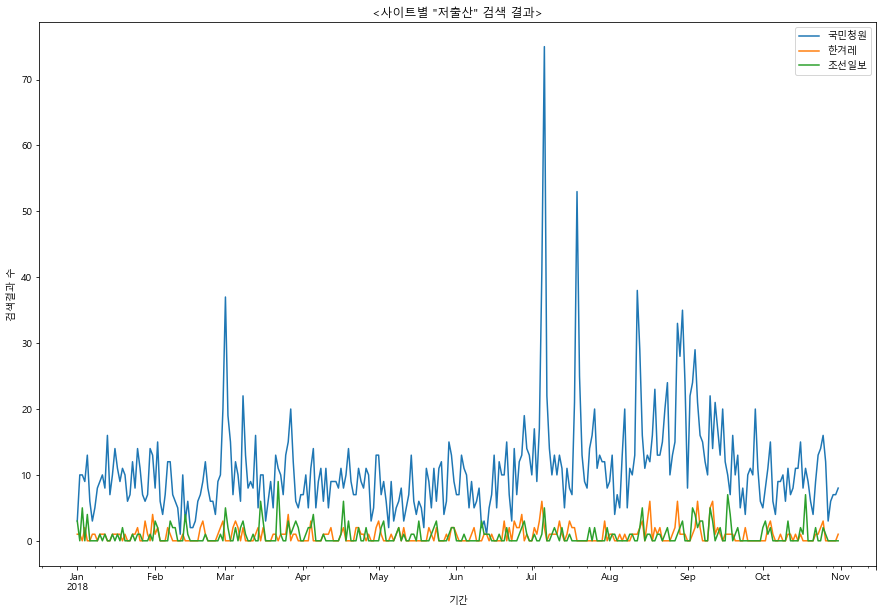

In [240]:
df_count.plot(figsize = (15,10))
plt.xlabel('기간')
plt.ylabel('검색결과 수')
plt.title('<사이트별 "저출산" 검색 결과>')
# plt.xlim(0,100)
# plt.ylim(0,80)
plt.show()

In [210]:
# 그래프를 자세히 보기 위해 분기별로 나누어봄(xlim이 적용되지 않음)
df_count_1q = df_count.loc['2018-01-01':'2018-03-31']
df_count_2q = df_count.loc['2018-04-01':'2018-06-30']
df_count_3q = df_count.loc['2018-06-01':'2018-10-31']
len(df_count_1q), len(df_count_2q), len(df_count_3q)

(90, 91, 153)

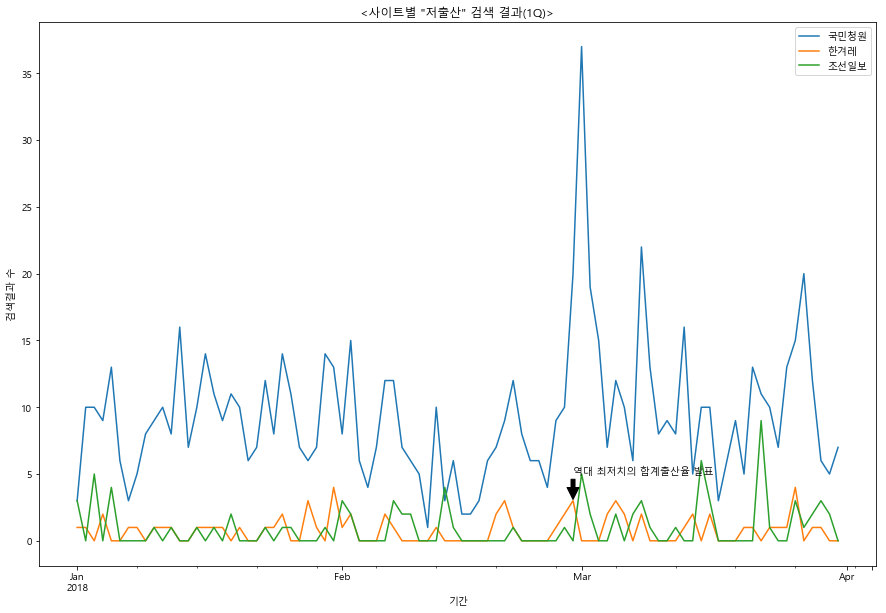

In [269]:
df_count_1q.plot(figsize = (15,10))
plt.xlabel('기간')
plt.ylabel('검색결과 수')
plt.title('<사이트별 "저출산" 검색 결과(1Q)>')
plt.annotate('역대 최저치의 합계출산율 발표', xy=(pd.to_datetime('2018-02-28'), 3), 
             xytext=(pd.to_datetime('2018-02-28'),5),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

In [273]:
# 청원 급상승 기간 언론기사 및 청원글 살펴보기
df_chosun['Title'][df_chosun['Date']=='2018-03-01']

171     이대로면… 5~7년내 신생아 20만명대 추락 '국가적 재앙'
172                 출산율 1.05명… 세계 유례없는 쇼크
173            "미혼청년 주거지원하고 결혼하면 혜택 더 주자"
174      결국 사망자가 출생아 추월, 또 하나의 핵폭탄 터지기 시작
257                   올해 출산율, 작년보다 더 떨어진다
Name: Title, dtype: object

In [276]:
df_hankr['Title'][df_hankr['Date']=='2018-02-28']

211           “초저출산, 만혼·비혼 탓 아니라 삶의 질 악화 때문” 
212          진짜 저녁있는 삶 되려면…근로기준법 개정뒤 남은 과제는? 
213     [한겨레 사설] ‘초저출산’ 늪에 깊이 빠진 한국, 미래가 두렵다 
Name: Title, dtype: object

In [272]:
df_petition['제목'][df_petition['청원시작']=='2018-03-01']

2809                    여성의 월경과 임신에 대하여 더욱 자세한 교육을 해 주세요!
2810            국고를 통해 직접 없는 사람부터 직접 월 100만원씩 지급했으면 좋겠습니다
2811                                             다자녀가정 혜택
2812                      출산율 역대 최저치를 기록해도 난임지원에는 소극적인 정부
2813                             외국인이민이나 난민을 적극적으로 받아주십시오
2814                      다자녀가정 주택단지(타운하우스)조성하여 임대방식으로 공급
2815         [저출산 및 고령화 대책 정책 제안]청년 및 노인 인력 활용을 통한 저출산 해소
2816                                    저출산 대책을 역으로 계획합시다
2817                               출산 육아지원, 국회의원들 급여 국민세금
2818                               출산율 증가를 위한 국가지원의 방향 의견
2819                                            저출산 대책 제안
2820                                                 출산문제
2821                                            저출산 문제 해결
2822                                         저출산 이혼이 원인이다
2823                           국방의 의무는 불공평하다. 여성도 의무 부과하라
2824                             저출산  80조 2천억원 예산 사용 내역조사
2825                        아이들 학교는 보내야 하잔아요 이젠 그것도 안되나요?
2826          

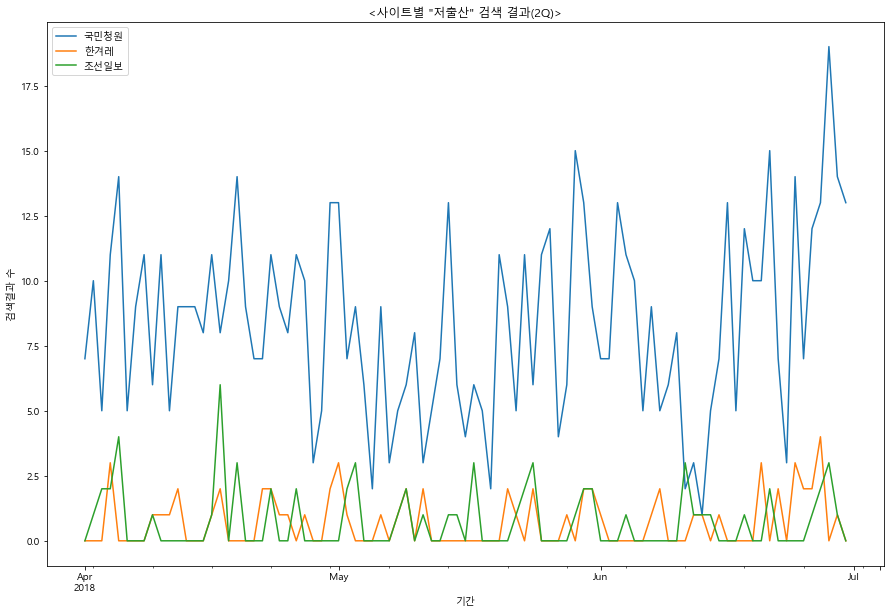

In [278]:
df_count_2q.plot(figsize = (15,10))
plt.xlabel('기간')
plt.ylabel('검색결과 수')
plt.title('<사이트별 "저출산" 검색 결과(2Q)>')
plt.show()

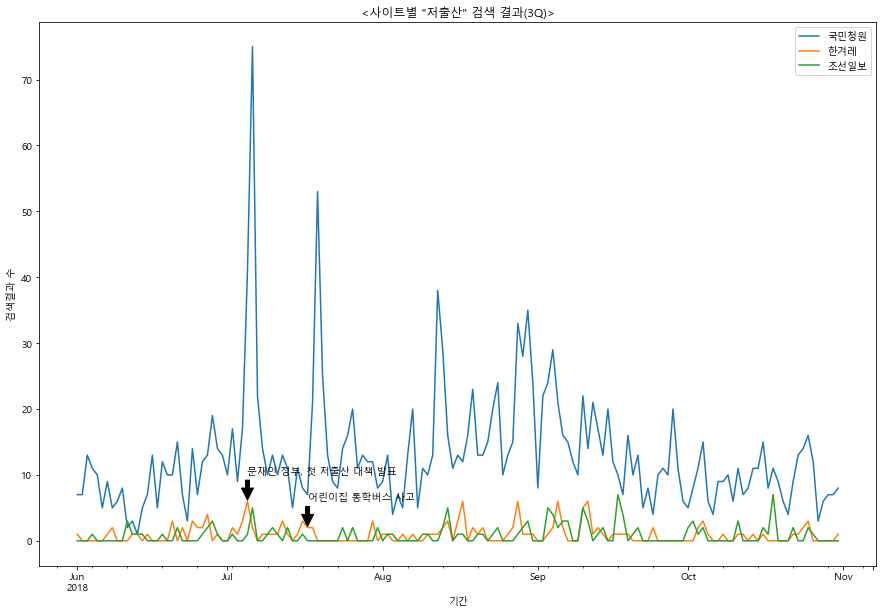

In [286]:
df_count_3q.plot(figsize = (15,10))
plt.xlabel('기간')
plt.ylabel('검색결과 수')
plt.title('<사이트별 "저출산" 검색 결과(3Q)>')
plt.annotate('문재인 정부, 첫 저출산 대책 발표', xy=(pd.to_datetime('2018-07-05'), 6), 
             xytext=(pd.to_datetime('2018-07-05'),10),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('어린이집 통학버스 사고', xy=(pd.to_datetime('2018-07-17'), 2), 
             xytext=(pd.to_datetime('2018-07-17'),6),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

In [287]:
# 청원 급상승 기간 청원글 살펴보기
df_petition['제목'][df_petition['청원시작']=='2018-07-18']

1421        유아보육교사및 유치원교사 원장의 사고이력 조회서비스를 열람할수있게해주세요
1422                  입법부가  어린4살아이 죽였다 해산청원합니다 읽어주세요
1423                             특수교사 정규직이 현저히 모자랍니다
1424                                     효율적인 저출산 대책
1425                              난민수용에 찬성하는 인간들 보아라
1426                           이민정책 여러가지 저출산대책을 고려하자
1427           ★가해 청소년은 용서받고 피해 학생은 지속 고통받으면 애낳고싶나?★
1428                                국가가 우리아이들을 지켜주세요
1429                                 어린이집차량 안전장치 의무화
1430    스쿨버스 등 학생이 이용하는 모든 차량 운행에 대한 법 제도 강화 요청 합니다.
1431                         어린이집 운행 차량 안전 장치 부착 의무화
1432                           4살 아이 하나 못지켜주는 게 나라냐?
1433                               유치원 통학차량 방치 사고 관련
1434                        어린이집 통학차량 사고 방지 대책마련 촉구!
1435                              다자녀 자동차 취등록세 혜택 연장
1436    어린이집 통학차량 동작 감지센서 및 비상 벨 의무화와를 법의로 정했으면 합니다.
1437                양성평등에 예외란 없어야 합니다. 여자도 군대를 가야합니다
1438                                 대통령님께 감히 청원드립니다
1439                              통학차량은 이렇게 만들

In [ ]:
# 시계열 분석을 통해 화제를 불러온 이슈 및 그와 관련된 여론 동향을 파악할 수 있었음
# '저출산'에 대한 게시글(뉴스)의 개수는 구간별로 비슷한 경향이 나타나긴 하지만 
# 정확한 분석을 위해서는 회귀분석이 필요함
# 사이트 성향의 정성적인 비교는 가능하지만 정량적 비교를 위해 키워드 분석을 실시

## 사이트별 빈출키워드 추출 및 시각화

In [37]:
hannanum = Hannanum()
# kkma = Kkma()
# komoran = Komoran()
# # mecab = Mecab()
# twitter = Twitter()

In [214]:
len(df_petition), len(df_chosun), len(df_hankr)

(3339, 265, 256)

### 국민청원

In [215]:
add_tokens1 = []
count = 0

for text in df_petition['제목']:
    text = text.replace('\ud83c', '').replace('\xa0', '').replace('\u200b', '').replace('\u2013', '').replace('\u119e', '').replace('\u11a2', '').replace('\u200b', '')
    tokens = hannanum.nouns(text)
    add_tokens1 = add_tokens1 + tokens
    
    count += 1
    if count % 20 == 0:
        print(count)
        
print('Finished!')

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
Finished!


In [216]:
len(add_tokens1), add_tokens1[:10]

(14672, ['저출산', '관련', '육아휴직', '어린이집', '증설', '저출산', '↔', '어린이집', '부족', '상충'])

In [230]:
# STOPWORDS 설정
# 특징적이지 않은 단어는 stopwords로 제외하였음
one_words = []
two_words = []
etc_words = []
for noun in add_tokens1:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

stop_words = ['청원','일자리', '문재','대통령님','대통령', '대한민국','주세요','저출산', '대책', '.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가', '를']
stop_words.extend(one_words)

len(one_words), len(two_words), len(etc_words), len(stop_words)

(0, 1497, 3941, 32)

In [231]:
# stop_words 빼기
add_tokens1 = [word for word in add_tokens1 if word not in stop_words]
len(add_tokens1), add_tokens1[:10]

(12600, ['관련', '육아휴직', '어린이집', '증설', '어린이집', '부족', '상충', '관계', '어린이집', '유지'])

In [232]:
# Collocation
equal_dev1 = nltk.Text(add_tokens1, name = '저출산 청원 제목')
equal_dev1.collocations(num=20, window_size=3)
# '저출산' 

일반행정공무원 운전공무원; 헌법개정 일반행정공무원; 내용추 헌법개정; 양도세 100; 민간어린이집 가정어린이집; 1가구
2주택부터; 2주택부터 양도세; 임산부 배려석; 국민연금 국민연금; 남성만 실질적; 2주택부터 부동산; 1가구 부동산; 투표권
입법청원; 초등학교 저학년; 실질적 국방의무; 어린이집 유치원; 부동산 양도세; 포퓰리즘 방지법; 2주택자 양도세; 부동산
100


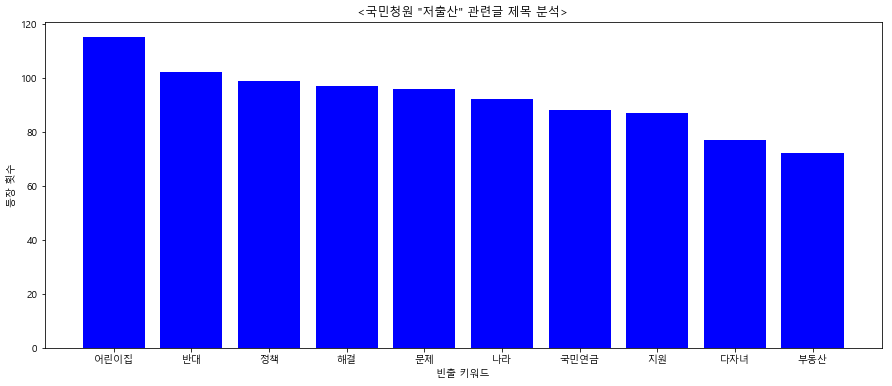

In [233]:
freq1 = equal_dev1.vocab()
# most_common() to DF
sorted_keys = []
sorted_values = []
for idx in freq1.most_common():
    sorted_keys.append(idx[0])
    sorted_values.append(idx[1])
    if len(sorted_keys) == 10:
        break
df_freq1 = pd.DataFrame({'keyword':sorted_keys,
                        'count': sorted_values})

plt.figure(figsize = (15, 6))
plt.bar(range(10), sorted_values, color = 'b')
plt.xticks(range(10), sorted_keys)
plt.xlabel('빈출 키워드')
plt.ylabel('등장 횟수')
plt.title('<국민청원 "저출산" 관련글 제목 분석>')
plt.show()

### 한겨레

In [59]:
add_tokens2 = []
count = 0

for text in df_hankr['Title']:
    text = text.replace('\ud83c', '').replace('\xa0', '').replace('\u200b', '').replace('\u2013', '').replace('\u119e', '').replace('\u11a2', '').replace('\u200b', '')
    tokens = hannanum.nouns(text)
    add_tokens2 = add_tokens2 + tokens
    
    count += 1
    if count % 20 == 0:
        print(count)
        
print('Finished!')

20
40
60
80
100
120
140
160
180
200
220
240
Finished!


In [98]:
# STOPWORDS 설정
one_words = []
two_words = []
etc_words = []
for noun in add_tokens2:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

stop_words = ['청원','일자리', '문재','대통령님','대통령', '대한민국','주세요', '사설', '[한겨레', '.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '시론', '칼럼', '저출산', '호','을','이','다','만','로','가', '를']
stop_words.extend(one_words)

len(one_words), len(two_words), len(etc_words), len(stop_words)

(0, 375, 715, 35)

In [99]:
# stop_words 빼기
add_tokens2 = [word for word in add_tokens2 if word not in stop_words]
len(add_tokens2)

1338

In [100]:
equal_dev2 = nltk.Text(add_tokens2, name = '저출산 관련 한겨레 제목')
equal_dev2.collocations(num=20, window_size=3)

김성태 ‘출산주도성장’; 19년 노사정; 1학년 ‘10시; ‘10시 출근’; ‘세법 개정안’; 국민연금 20년


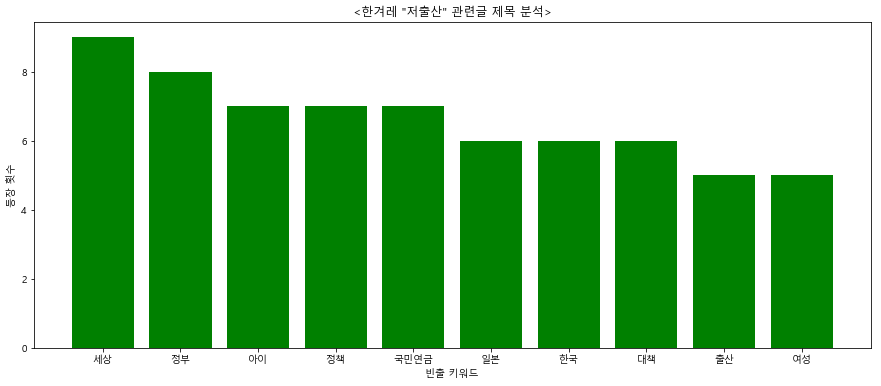

In [177]:
freq2 = equal_dev2.vocab()
# most_common() to DF
sorted_keys = []
sorted_values = []
for idx in freq2.most_common():
    sorted_keys.append(idx[0])
    sorted_values.append(idx[1])
    if len(sorted_keys) == 10:
        break
df_freq2 = pd.DataFrame({'keyword':sorted_keys,
                        'count': sorted_values})

plt.figure(figsize = (15, 6))
plt.bar(range(10), sorted_values, color = 'g')
plt.xticks(range(10), sorted_keys)
plt.xlabel('빈출 키워드')
plt.ylabel('등장 횟수')
plt.title('<한겨레 "저출산" 관련글 제목 분석>')
plt.show()

### 조선일보

In [65]:
add_tokens3 = []
count = 0

for text in df_chosun['Title']:
    text = text.replace('\ud83c', '').replace('\xa0', '').replace('\u200b', '').replace('\u2013', '').replace('\u119e', '').replace('\u11a2', '').replace('\u200b', '')
    tokens = hannanum.nouns(text)
    add_tokens3 = add_tokens3 + tokens
    
    count += 1
    if count % 20 == 0:
        print(count)
        
print('Finished!')

20
40
60
80
100
120
140
160
180
200
220
240
260
Finished!


In [66]:
# STOPWORDS 설정
one_words = []
two_words = []
etc_words = []
for noun in add_tokens3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

stop_words = ['청원','일자리', '문재','대통령님','대통령', '대한민국','주세요', '.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가', '를']
stop_words.extend(one_words)

len(one_words), len(two_words), len(etc_words), len(stop_words)

(98, 453, 540, 128)

In [67]:
# stop_words 빼기
add_tokens3 = [word for word in add_tokens3 if word not in stop_words]
len(add_tokens3), add_tokens3[:10]

(1312,
 ['분만실', '아내들', '남편', "'저리가'", '의문', '남편', '침대난간', '우리·IBK기업은행서', '아이', '통장'])

In [68]:
equal_dev3 = nltk.Text(add_tokens3, name = '저출산 관련 한겨레 제목')
equal_dev3.collocations(num=20, window_size=3)

알려주세요… 구매권; 알려주세요… 케이크·유아복; 케이크·유아복 구매권; 육아휴직자 건보료


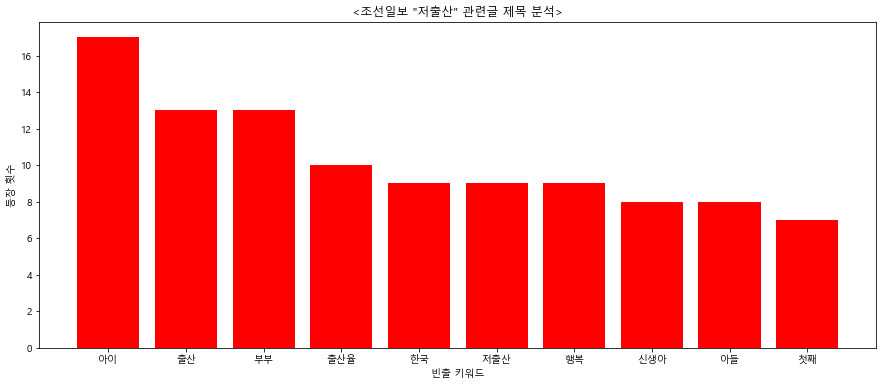

In [174]:
freq3 = equal_dev3.vocab()
# most_common() to DF
sorted_keys = []
sorted_values = []
for idx in freq3.most_common():
    sorted_keys.append(idx[0])
    sorted_values.append(idx[1])
    if len(sorted_keys) == 10:
        break
df_freq3 = pd.DataFrame({'keyword':sorted_keys,
                        'count': sorted_values})

plt.figure(figsize = (15, 6))
plt.bar(range(10), sorted_values, color = 'r')
plt.xticks(range(10), sorted_keys)
plt.xlabel('빈출 키워드')
plt.ylabel('등장 횟수')
plt.title('<조선일보 "저출산" 관련글 제목 분석>')
plt.show()

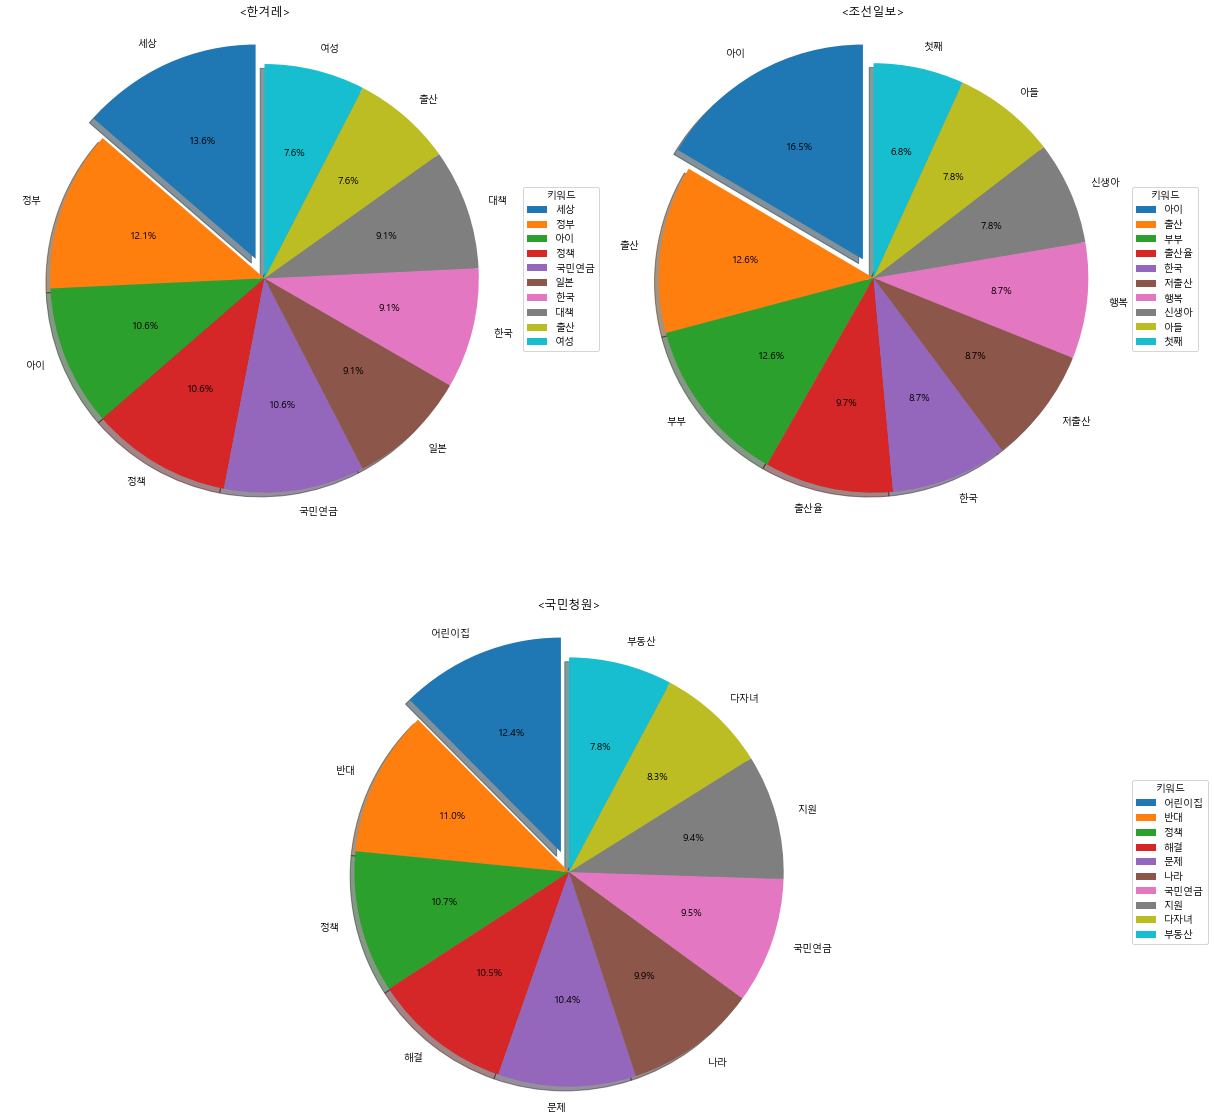

In [313]:
plt.figure(figsize=(20,20))
explode = (0.1, 0,0,0,0,0,0,0,0,0) 

ax1 = plt.subplot(212)
labels = df_freq1['keyword']
sizes  = df_freq1['count']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.legend(title="키워드",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('<국민청원>')

ax2 = plt.subplot(221)
labels = df_freq2['keyword']
sizes  = df_freq2['count']
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  
ax2.legend(title="키워드",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('<한겨레>')

labels = df_freq3['keyword']
sizes  = df_freq3['count']
ax3 = plt.subplot(222)
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  
ax3.legend(title="키워드",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('<조선일보>')

plt.show()

In [ ]:
# 한겨레 기사 제목을 분석한 결과 '세상'이 가장 많이 나타났고,
# 조선일보와 비교해 '세상', '정책', '국민연금', '일본'이 두드러지게 나타났다.
# '세상'이 왜 많이 나타나는지, '국민연금', '일본', '여성'이 어떤 이슈와 관련있는지 알아볼 필요가 있다.

In [ ]:
# 조선일보 기사 제목을 분석한 결과 '아이'가 가장 많이 나타났고,
# 한겨레와 비교해 '부부', '행복', '신생아', '아들', '첫째'가 두드러지게 나타났다.
# 위 키워드에 대해 한걸음 더 들어가볼 필요가 있다.

In [ ]:
# 국민청원 게시글 제목을 분석한 결과 '어린이집'이 가장 많이 나타났고, 
# '국민연금', '부동산'이 저출산과 관련된 주제임을 예상해볼 수 있었으며,
# '반대', '정책', '해결', '문제', '지원' 등의 단어에서 정책적 지원과 문제 해결을 촉구하고 있음을 알수 있다.

# 한겨레와 비교해 '정부', '정책', '대책' 같은 단어는 비슷하게 나타났으나,
# '어린이집', '반대', '해결', '나라', '지원', '다자녀' 등이 두드러지게 나타났다.

# 조선일보와 비교해서는 비슷한 키워드가 나타나지 않았다. 

# 결론적으로, '저출산'에 대한 국민청원 게시판의 성향은
# 관심사(키워드)에 있어서는 한겨레와 상대적으로 비슷한 키워드를 공유하고 있었으며, 조선과는 거리가 있었다.
# 한편 '어린이집'이 두드러지게 나타난 점에서 어린이집 통학버스 사건 등 이슈에 민감하게 반응하고,
# '반대', '해결', '지원' 등 빠른 문제해결을 촉구하는 단어들이 나타난 것으로 보아 
# 여론의 직접적인 의견표현 창구로 사용되고 있음을 짐작해볼 수 있다.

# 후속 분석에서는 위에 나타난 각 키워드의 연관단어를 살펴볼 필요가 있다.

# Wordcloud 

In [71]:
import numpy as np
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

In [165]:
shape_img = np.array(Image.open('images/hanbando.png'))
cloud_img = ImageColorGenerator(shape_img)
shape_img2 = np.array(Image.open('images/hanbando_green.png'))
cloud_img2 = ImageColorGenerator(shape_img2)
shape_img3 = np.array(Image.open('images/hanbando_red.png'))
cloud_img3 = ImageColorGenerator(shape_img3)

In [227]:
wordcloud1 = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     mask = shape_img, 
                     background_color = 'white',
                     min_font_size=1, max_font_size=40).generate_from_frequencies(freq1)
wordcloud2 = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     mask = shape_img2, 
                     background_color = 'white',
                     min_font_size=1, max_font_size=40).generate_from_frequencies(freq2)
wordcloud3 = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     mask = shape_img3, 
                     background_color = 'white',
                     min_font_size=1, max_font_size=40).generate_from_frequencies(freq3)

(-0.5, 265.5, 479.5, -0.5)

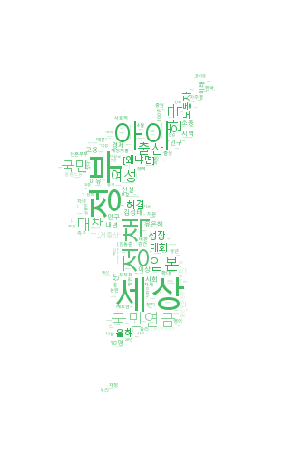

In [228]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud2.recolor(color_func=cloud_img2))
plt.axis('off')

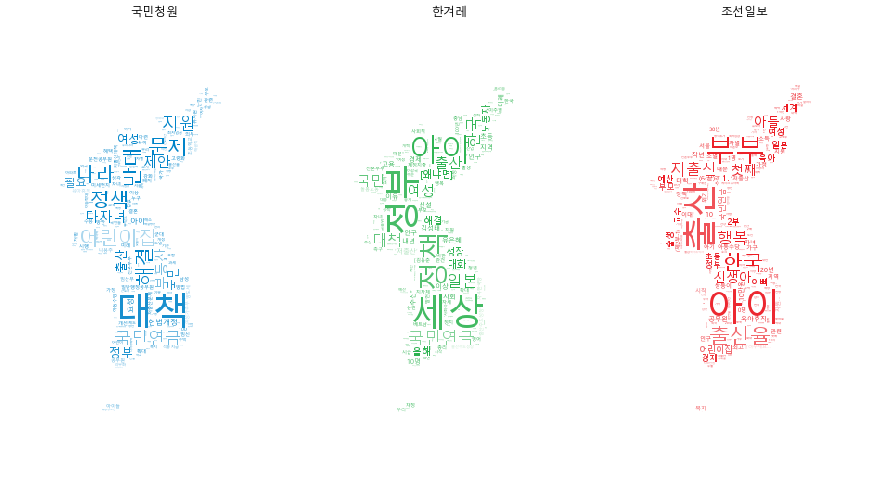

In [229]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(wordcloud1.recolor(color_func=cloud_img))
plt.title('국민청원')
plt.axis('off')
plt.subplot(132)
plt.imshow(wordcloud2.recolor(color_func=cloud_img2))
plt.title('한겨레')
plt.axis('off')
plt.subplot(133)
plt.imshow(wordcloud3.recolor(color_func=cloud_img3))
plt.axis('off')
plt.title('조선일보')

plt.show()

In [ ]:
# WordCloud를 활용하니 빈도와 단어를 동시에 확인할 수 있어 좀더 직관적인 확인이 가능함.

## 각 사이트별 특징 키워드 뽑아내기

In [191]:
df_freq1['score'] = np.arange(len(df_freq1),0,-1)
df_freq2['score'] = np.arange(len(df_freq2),0,-1)
df_freq3['score'] = np.arange(len(df_freq3),0,-1)